# Stock Analysis - Part A

In [106]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.ticker as mticker  # Needed for X-axis formatting

In [107]:
# Download IVV stock data for January 2025
ivv = yf.download("IVV", start="2025-01-01", end="2025-01-31")

# Remove MultiIndex and simplify column names
ivv.columns = ivv.columns.get_level_values(0)

# Convert all relevant columns to float
ivv = ivv[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)

# Export the IVV stock data to an excel file in the same folder
ivv.to_excel("IVV_January_2025.xlsx", index=True)

[*********************100%***********************]  1 of 1 completed

In [108]:
# Reindex to include all calendar days (so weekends/holidays remain gaps)
full_date_range = pd.date_range(start="2025-01-01", end="2025-02-01", freq='D')  # Includes weekends
ivv = ivv.reindex(full_date_range)  # Introduces NaNs for non-trading days

# Convert index to numeric values to force proper candlestick spacing
ivv['trading_index'] = pd.factorize(ivv.index)[0]  # Assigns sequential numbers to trading days

In [109]:
# Define market colors separately before passing to make_mpf_style
market_colors = mpf.make_marketcolors(
    up='white', down='black',  # Ensures candles are black/white 
    edge={'up':'black', 'down':'black'},  # Keep candle edges black
    wick={'up':'black', 'down':'black'}  # Keep wicks black
)

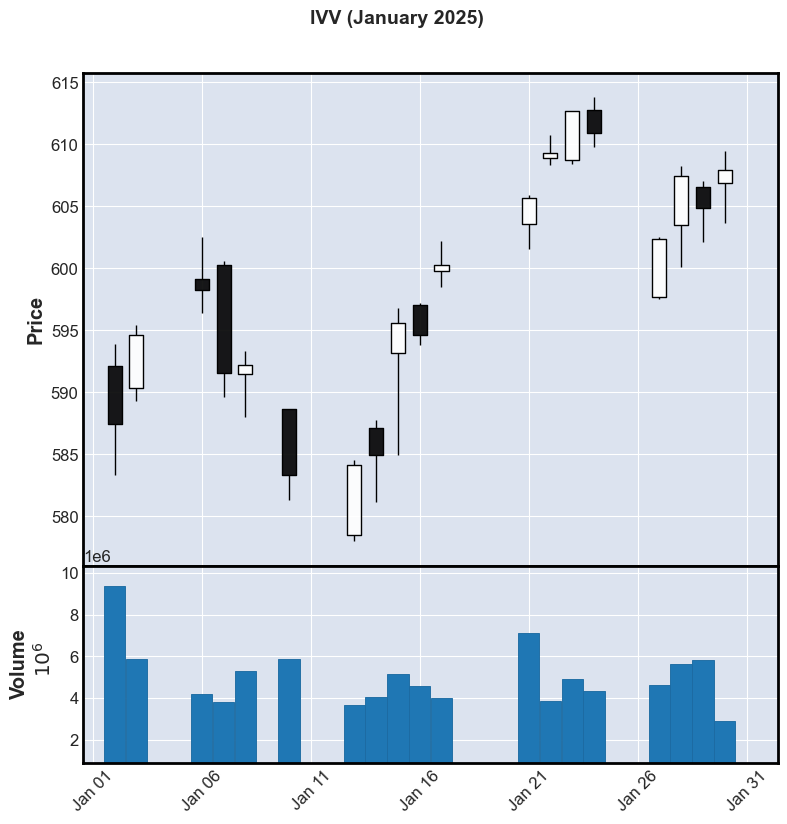

In [110]:
# Create the candlestick plot and return figure to modify labels
fig, ax = mpf.plot(
    ivv,
    type='candle',
    style='default',  # Use default mplfinance style
    ylabel="Price",  # No title inside chart
    ylabel_lower="Volume",
    volume=True,
    figsize=(8, 8),  # Make chart square-shaped
    datetime_format='%b %d',  # Format x-axis date labels
    tight_layout=True,
    returnfig=True
)

# Set y-axis limits to ensure candlesticks fit well, and match the assignment sample
ax[0].set_ylim(ivv['Low'].min() - 2, ivv['High'].max() + 2)

# Move price and volume labels to the left
ax[0].yaxis.set_label_position("left")
ax[0].yaxis.tick_left()
ax[2].yaxis.set_label_position("left")
ax[2].yaxis.tick_left()

# Add black borders to price and volume graphs
for spine in ax[0].spines.values():  
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

for spine in ax[2].spines.values():  
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

# Move the title outside the chart
fig.suptitle("IVV (January 2025)", fontsize=14, fontweight='bold', y=1.05)

# Show the updated figure
plt.show()
